## 1) Preliminary tasks

1.1 Importing libraries

In [29]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

1.2 Create a dataframe movies from CSV 

In [30]:
# Read in the data

movies = pd.read_csv(r'D:\All other folders\SelfStudyNotes\Files for Portfolio\Alex Project 4\movies.csv')

In [31]:
# Observing the data

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


1.3 Checking for missing data 

In [32]:
# Checking if there is any missing data (the null values)
 
for col in movies.columns:
    percent_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


1.4 Checking the datatypes of the columns

In [33]:
# Checking the datatypes of the columns

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

1.5 Altering the datatypes of few columns

In [34]:
# Changing the datatypes of some columns

movies['budget'] = movies['budget'].fillna(0)              # Convert nan/null to 0
movies['budget'] = movies['budget'].astype('int64')        # Convert to int64 from float64

movies['gross'] = movies['gross'].fillna(0)                # Convert nan/null to 0
movies['gross'] = movies['gross'].astype('int64')          # Convert to int64 from float64

1.6 Adding new column for correctness and data consistency

In [35]:
# Creating the correct year column - yearcorrect (as all the years in column 'year' do not match years of 'released')

movies['yearcorrect'] = movies['released'].str.extract(r'([0-9]{4})', expand=True)

In [54]:
# Sorting the data by gross, descending
    
movies.sort_values(['gross'], inplace= False, ascending = False)
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


In [37]:
# To display the all rows of dataset by default

pd.set_option('display.max_rows', None)

1.7 Dropping duplicate rows 

In [55]:
# Droping duplicates if any

# movies.drop_duplicates()                          # To drop the duplicates if the entire rows are duplicates
# movies['company'].sort_values(ascending = False)  # To view company column's data in mentioned order(here descending)
# movies['company'].drop_duplicates().sort_values(ascending = False)  #To view company column's distinct data in the mentioned order

## 2)	Task: Finding if there is a correlation in two particular columns: budget and gross

2.1 Scatterplot of budget and gross

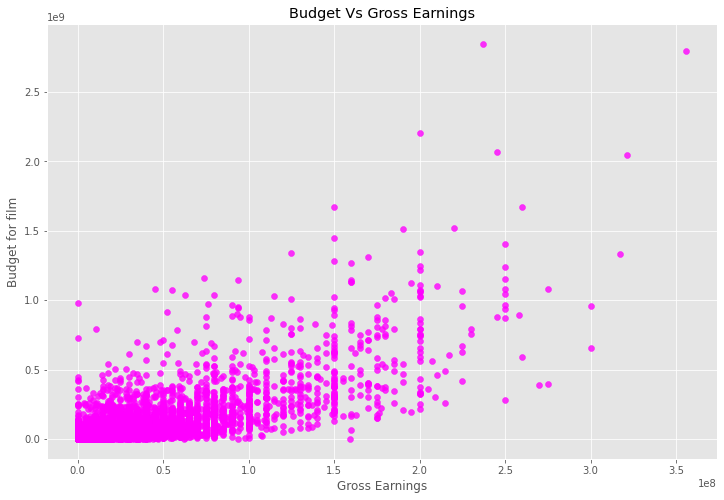

In [39]:
#ScatterPlot of Budget Vs Gross

plt.scatter(x = movies['budget'], y = movies['gross'], color = 'magenta',  alpha = 0.8)
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

In [40]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


2.2 Regression plot of budget and gross

<AxesSubplot:xlabel='budget', ylabel='gross'>

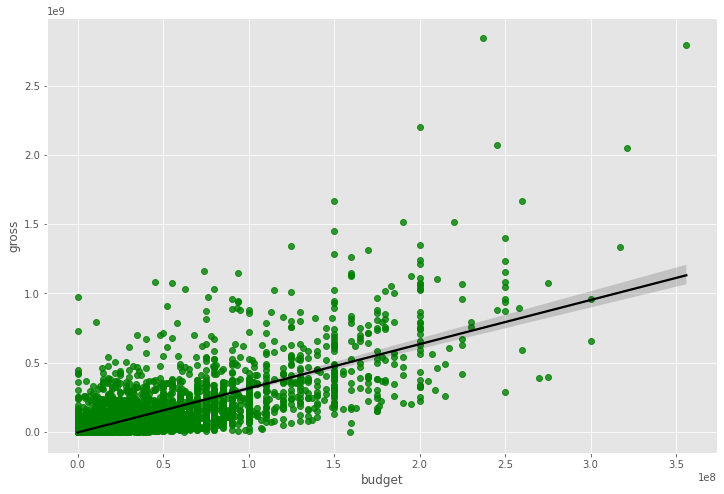

In [41]:
# Creating regression plot of Budget Vs Gross using SeaBorn

sns.regplot(x = 'budget', y = 'gross', data = movies, scatter_kws = {"color": "green"}, line_kws = {"color" : "black"})

2.3 Finding pairwise correlation of numeric columns

In [42]:
movies.corr(method = 'pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


Observation: There is a high correlation 0.740395 between budget and gross

2.4 Heatmap of the correlation values

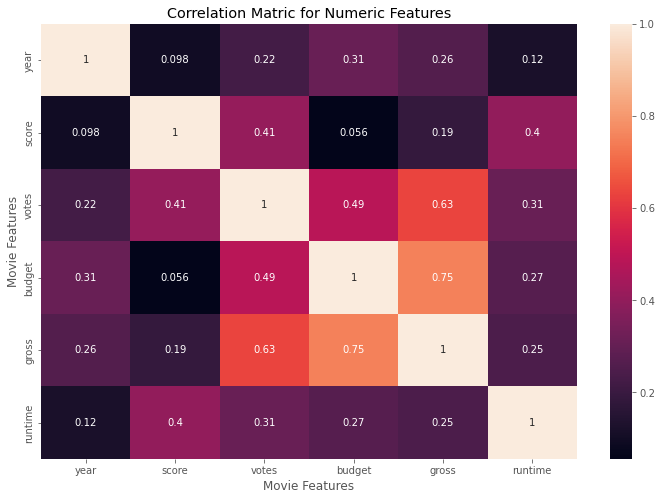

In [43]:
# Plotting the heatmap of the correlation values

correlation_matrix = movies.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Observation : As it can be seen in above heatmap, the colour of correlation of budget and gross is orange with a value of 0.74 which is very near to the colour of white corresponding to the maximum correlation of 1.

## 3) Task: Trying to find general correlation among different columns of all the data

3.1 Representing the non-numeric values into numeric values using categorical datatype

In [46]:
# Representing the non numeric values into numeric values using categorical datatype

movies_numerized = movies

for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes
        
movies_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


In [47]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


3.2 Finding pairwise correlation of numeric columns

In [48]:
movies_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027606


3.3 Heatmap of the correlation values

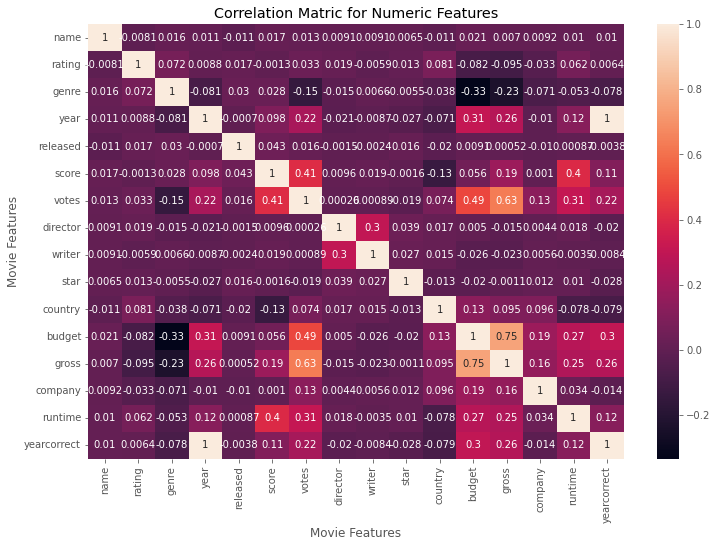

In [49]:
# Plotting the heatmap of all the values including the categorical data

correlation_matrix = movies_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

3.4 Displaying the correlation values linearly

In [56]:
# Displaying the correlation matrix linearly using unstack

correlation_mat = movies_numerized.corr()  

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

3.5 Sorting the linearly displayed correlation values

In [57]:
# Displaying the correlation values sorted ascending
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
        gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145307
dtype: float64

3.6 Finding the pairs with higher correlation

In [58]:
# Finding the pairs with high correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr.head()

gross        votes     0.632834
votes        gross     0.632834
gross        budget    0.750157
budget       gross     0.750157
yearcorrect  year      0.996397
dtype: float64

## 4)	Observation and Conclusion
4.1 There is a high correlation in budget and gross. This says that as the high budget movies are observed to have achieved high gross revenues. <br>
4.2 There is a fairly high correlation in votes and gross as well. So, this also says that the movies with high gross revenues have received large number of votes.
